In [97]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
warnings.filterwarnings('ignore')

In [75]:
df = pd.read_csv('D:\Study\PythonPrj\pythonProject\Data_Science\Cars\convert_number_data_final.csv')
# df = df.drop(['curbWeight', 'vEengineDisplacement'], axis=1)
df = df[df['price'].notna()]
df.head()

,accelerationTime,bodyType,brand,cargoVolume,curbWeight,driveWheelConfiguration,eLabel,emissionsCO2,engineCapacity,fuelCapacity,...,seatingCapacity,speed,torque,vEengineDisplacement,vEenginePower,vEengineType,vehicleTransmission,weightTotal,wheelbase,width
0,6.8,3,4,1020.0,1375.0,1,6.0,218.0,1781.0,55.0,...,5.0,238.0,270.0,1781.0,154.0,1,2,1935.0,2519.0,1763.0
1,7.8,7,4,1680.0,1745.0,1,2.0,115.0,1968.0,73.0,...,5.0,241.0,400.0,1968.0,150.0,1,1,2425.0,2924.0,1886.0
2,9.2,7,30,1668.0,1188.0,0,4.0,146.0,1798.0,50.0,...,5.0,210.0,174.0,1798.0,104.0,1,2,1790.0,2595.0,1770.0
3,9.5,7,4,1680.0,1685.0,0,1.0,109.0,1968.0,73.0,...,5.0,219.0,370.0,1968.0,120.0,1,1,2330.0,2924.0,1886.0
4,7.0,7,4,1680.0,1680.0,0,2.0,144.0,1984.0,73.0,...,5.0,250.0,370.0,1984.0,180.0,1,1,2310.0,2924.0,1886.0


In [76]:
df.shape

(75824, 30)

In [77]:
df.columns

Index(['accelerationTime', 'bodyType', 'brand', 'cargoVolume', 'curbWeight',
       'driveWheelConfiguration', 'eLabel', 'emissionsCO2', 'engineCapacity',
       'fuelCapacity', 'fuelConsumption', 'fuelType', 'height', 'length',
       'modelDate', 'numberOfDoors', 'numberOfForwardGears', 'payload',
       'price', 'roofLoad', 'seatingCapacity', 'speed', 'torque',
       'vEengineDisplacement', 'vEenginePower', 'vEengineType',
       'vehicleTransmission', 'weightTotal', 'wheelbase', 'width'],
      dtype='object')

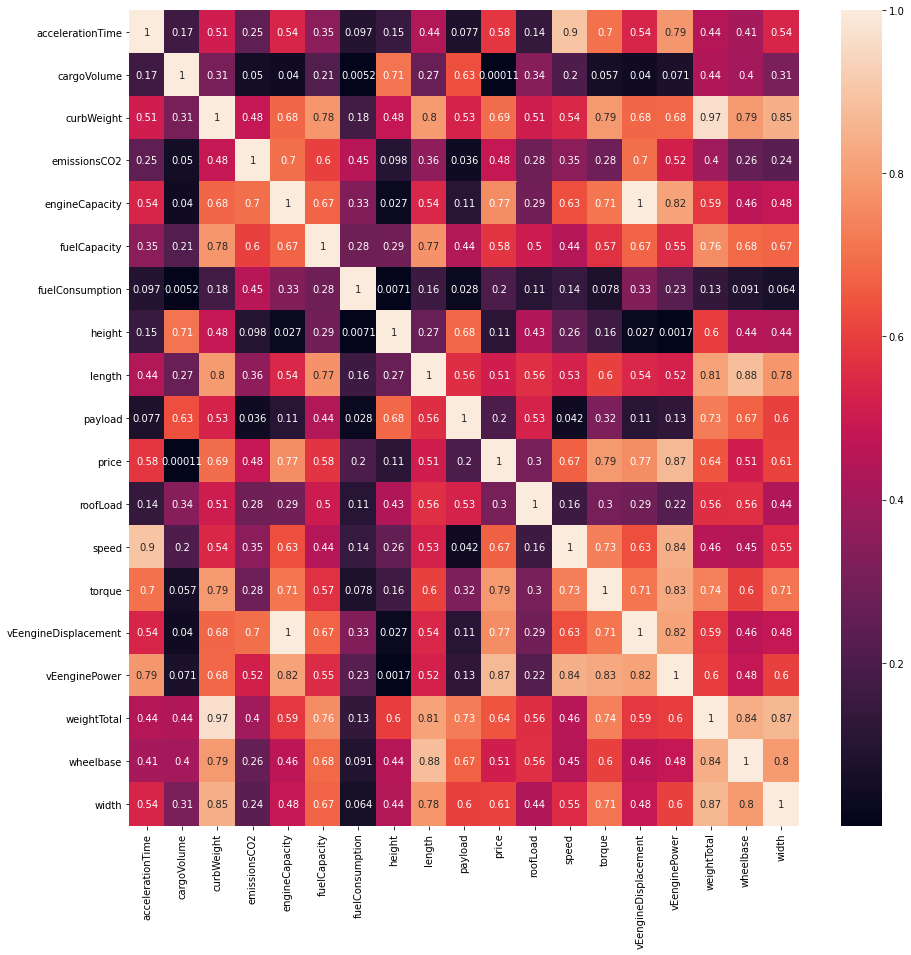

In [78]:
dataNumerical = df.drop(["bodyType", "brand", "driveWheelConfiguration", "eLabel",
         "fuelType", "modelDate", "numberOfDoors", "numberOfForwardGears",
         "seatingCapacity", "vEengineType",
         "vehicleTransmission"], axis=1)
plt.subplots(figsize = (15, 15))
sns.heatmap(np.abs(dataNumerical.corr()), annot=True)
plt.savefig("CorrelationMatrix.png", dpi=150)

In [79]:
df = df.drop(['curbWeight', 'vEengineDisplacement', 'vEengineType'], axis=1)

In [80]:
# seating Capacity: fill with most occuring
categorical_features = ["bodyType", "brand", "driveWheelConfiguration", "eLabel",
         "fuelType", "modelDate", "numberOfDoors", "numberOfForwardGears",
         "seatingCapacity", "vEengineType",
         "vehicleTransmission"]

In [81]:
# bodyType
df['bodyType'].isna().sum()

0

In [82]:
# brand
df['brand'].isna().sum()

0

In [83]:
df['driveWheelConfiguration'].isna().sum()

0

In [84]:
# eLabel
df['eLabel'].isna().sum()

14001

In [85]:
# elabel list: ['a', 'b', 'c', 'd', 'e', 'f', 'g']
print(df['eLabel'].value_counts())
print(f"Most frequency value: {df['eLabel'].value_counts().index[0]}")
# fill with most frequency
df['eLabel'] = df['eLabel'].fillna(df['eLabel'].value_counts().index[0])

6.0    35020
4.0     6103
3.0     6064
5.0     6022
2.0     5221
1.0     2490
0.0      903
Name: eLabel, dtype: int64
Most frequency value: 6.0


In [86]:
df['fuelType'].isna().sum()

137

In [87]:
# fuel type list
#  ['Bio ethanol', 'Bio ethanol / gasoline', 'Diesel', 'Gasoline', 'LPG', 'LPG / gasoline',
#  'Natural gas', 'Natural gas / gasoline']
print(df['fuelType'].value_counts())
print(f"Most frequency value: {df['fuelType'].value_counts().index[0]}")
# fill with most frequency
df['fuelType'] = df['fuelType'].fillna(df['fuelType'].value_counts().index[0])

3.0    46571
2.0    28035
0.0      390
7.0      204
5.0      192
6.0      130
4.0       93
1.0       72
Name: fuelType, dtype: int64
Most frequency value: 3.0


In [88]:
df['modelDate'].isna().sum()

0

In [89]:
df['numberOfDoors'].isna().sum()

0

In [90]:
df['numberOfForwardGears'].isna().sum()

1974

In [92]:
# number of forward gear
print(df['numberOfForwardGears'].value_counts())
# most frequency value
print(f"Most frequency value: {df['numberOfForwardGears'].value_counts().index[0]}")
# fill with most frequency
df['numberOfForwardGears'] = \
    df['numberOfForwardGears'].fillna(df['numberOfForwardGears'].value_counts().index[0])

5.0    30358
6.0    25721
4.0     7875
7.0     5238
8.0     3178
9.0      842
3.0      638
Name: numberOfForwardGears, dtype: int64
Most frequency value: 5.0


In [93]:
df['seatingCapacity'].isna().sum()

1924

In [95]:
print(df['seatingCapacity'].value_counts())
# most frequency value
print(f"Most frequency value: {df['seatingCapacity'].value_counts().index[0]}")
# fill with most frequency
df['seatingCapacity'] = \
    df['seatingCapacity'].fillna(df['seatingCapacity'].value_counts().index[0])

5.0    63136
4.0     6600
7.0     1931
2.0     1238
6.0      448
9.0      435
8.0      110
3.0        2
Name: seatingCapacity, dtype: int64
Most frequency value: 5.0


In [96]:
df['vehicleTransmission'].isna().sum()

0

In [ ]:
# vehicle transmission list
# ['Automatic', 'Automatic with double clutch', 'Manual transmission', 'Semi-automatic', 'traploze automatic']

In [98]:
df.isna().sum()

accelerationTime            2169
bodyType                       0
brand                          0
cargoVolume                 1004
driveWheelConfiguration        0
eLabel                         0
emissionsCO2               14137
engineCapacity               168
fuelCapacity                 174
fuelConsumption             1092
fuelType                       0
height                        64
length                        16
modelDate                      0
numberOfDoors                  0
numberOfForwardGears           0
payload                      991
price                          0
roofLoad                   11126
seatingCapacity                0
speed                        745
torque                        97
vEenginePower                 39
vehicleTransmission            0
weightTotal                  984
wheelbase                     21
width                         20
dtype: int64

In [99]:
imputer = KNNImputer()
new_data = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
new_data.head()

,accelerationTime,bodyType,brand,cargoVolume,driveWheelConfiguration,eLabel,emissionsCO2,engineCapacity,fuelCapacity,fuelConsumption,...,price,roofLoad,seatingCapacity,speed,torque,vEenginePower,vehicleTransmission,weightTotal,wheelbase,width
0,6.8,3.0,4.0,1020.0,1.0,6.0,218.0,1781.0,55.0,9.1,...,42.247,75.0,5.0,238.0,270.0,154.0,2.0,1935.0,2519.0,1763.0
1,7.8,7.0,4.0,1680.0,1.0,2.0,115.0,1968.0,73.0,5.9,...,68.930,100.0,5.0,241.0,400.0,150.0,1.0,2425.0,2924.0,1886.0
2,9.2,7.0,30.0,1668.0,0.0,4.0,146.0,1798.0,50.0,6.2,...,30.580,75.0,5.0,210.0,174.0,104.0,2.0,1790.0,2595.0,1770.0
3,9.5,7.0,4.0,1680.0,0.0,1.0,109.0,1968.0,73.0,5.4,...,64.510,100.0,5.0,219.0,370.0,120.0,1.0,2330.0,2924.0,1886.0
4,7.0,7.0,4.0,1680.0,0.0,2.0,144.0,1984.0,73.0,7.4,...,69.770,100.0,5.0,250.0,370.0,180.0,1.0,2310.0,2924.0,1886.0


In [100]:
new_data.to_csv("fillKNN_data_final.csv", index=False)

In [101]:
new_data.isna().sum()

accelerationTime           0
bodyType                   0
brand                      0
cargoVolume                0
driveWheelConfiguration    0
eLabel                     0
emissionsCO2               0
engineCapacity             0
fuelCapacity               0
fuelConsumption            0
fuelType                   0
height                     0
length                     0
modelDate                  0
numberOfDoors              0
numberOfForwardGears       0
payload                    0
price                      0
roofLoad                   0
seatingCapacity            0
speed                      0
torque                     0
vEenginePower              0
vehicleTransmission        0
weightTotal                0
wheelbase                  0
width                      0
dtype: int64